In [1]:
#Import your packages
import pandas

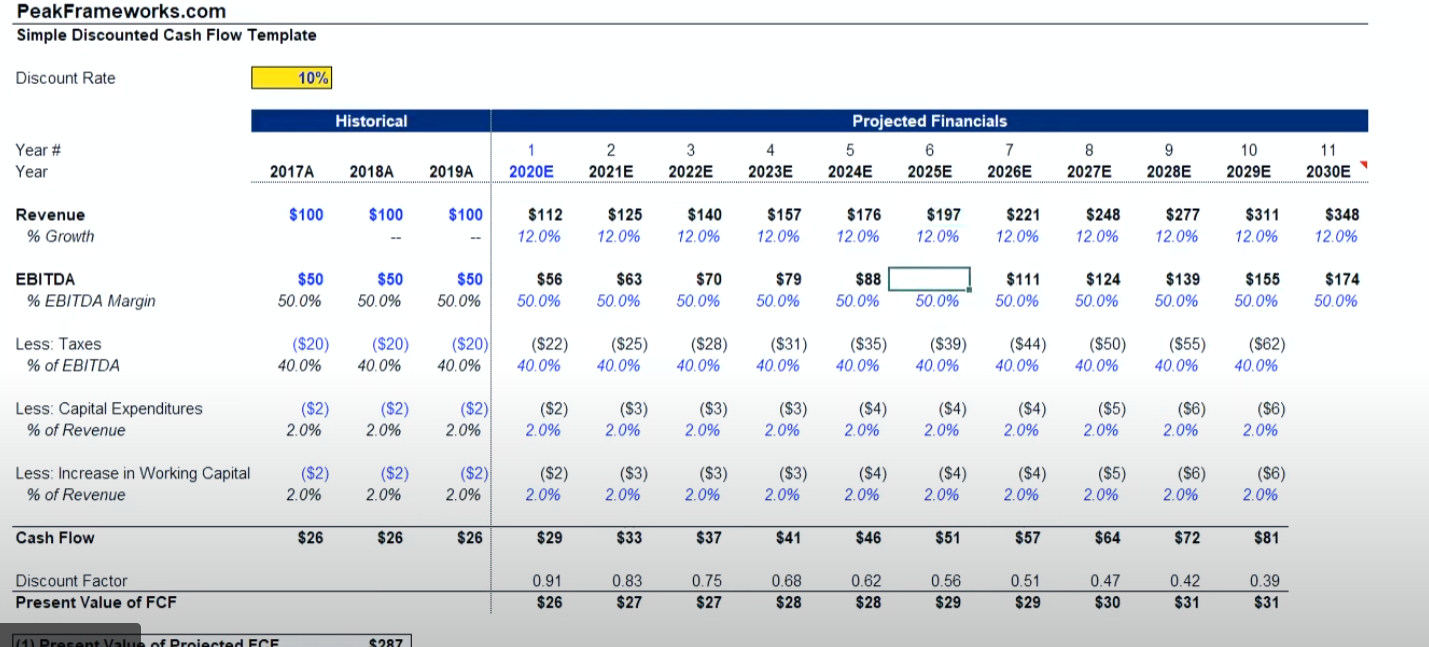

In [2]:
#Create the variables to store the parameters for your model
g_f = 1.18
E_m = 0.45
t_pct = 0.21
c_e = 0.03
w_c_g = 0.06
d_f = 0.94
e_m = 32.70

In [3]:
#Create the index
date = pandas.date_range(start='2022' ,end='2031' ,freq='Y')
date

DatetimeIndex(['2022-12-31', '2023-12-31', '2024-12-31', '2025-12-31',
               '2026-12-31', '2027-12-31', '2028-12-31', '2029-12-31',
               '2030-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [4]:
#Create a DataFrame
m_df = pandas.DataFrame(index=date)
t_v_df = pandas.DataFrame()
m_df

""
2022-12-31
2023-12-31
2024-12-31
2025-12-31
2026-12-31
2027-12-31
2028-12-31
2029-12-31
2030-12-31


In [5]:
#Populate your DataFrame
st_rev = 222
rev_p = [st_rev*g_f]

for i in range(1,len(date)):
        rev_p.append(rev_p[i-1]*g_f)
m_df['Revenue'] = rev_p
m_df[['Revenue']]


,Revenue
2022-12-31,261.960000
2023-12-31,309.112800
2024-12-31,364.753104
2025-12-31,430.408663
2026-12-31,507.882222
2027-12-31,599.301022
2028-12-31,707.175206
2029-12-31,834.466743
2030-12-31,984.670757


In [6]:
# EBITDA
m_df['EBITDA'] = m_df['Revenue'] * E_m
m_df

,Revenue,EBITDA
2022-12-31,261.960000,117.882000
2023-12-31,309.112800,139.100760
2024-12-31,364.753104,164.138897
2025-12-31,430.408663,193.683898
2026-12-31,507.882222,228.547000
2027-12-31,599.301022,269.685460
2028-12-31,707.175206,318.228843
2029-12-31,834.466743,375.510034
2030-12-31,984.670757,443.101841


In [7]:
#Taxes
m_df['Taxes'] = m_df['EBITDA'] * - t_pct
m_df.transpose()

,2022-12-31,2023-12-31,2024-12-31,2025-12-31,2026-12-31,2027-12-31,2028-12-31,2029-12-31,2030-12-31
Revenue,261.96000,309.11280,364.753104,430.408663,507.882222,599.301022,707.175206,834.466743,984.670757
EBITDA,117.88200,139.10076,164.138897,193.683898,228.547000,269.685460,318.228843,375.510034,443.101841
Taxes,-24.75522,-29.21116,-34.469168,-40.673619,-47.994870,-56.633947,-66.828057,-78.857107,-93.051387


In [8]:
# Capital Expenditures
m_df['cap_ex'] = m_df['Revenue'] * - c_e
m_df

,Revenue,EBITDA,Taxes,cap_ex
2022-12-31,261.960000,117.882000,-24.755220,-7.858800
2023-12-31,309.112800,139.100760,-29.211160,-9.273384
2024-12-31,364.753104,164.138897,-34.469168,-10.942593
2025-12-31,430.408663,193.683898,-40.673619,-12.912260
2026-12-31,507.882222,228.547000,-47.994870,-15.236467
2027-12-31,599.301022,269.685460,-56.633947,-17.979031
2028-12-31,707.175206,318.228843,-66.828057,-21.215256
2029-12-31,834.466743,375.510034,-78.857107,-25.034002
2030-12-31,984.670757,443.101841,-93.051387,-29.540123


In [9]:
#Increase in Working Capital
m_df['Working Cap'] = m_df['Revenue'] * - w_c_g
m_df

,Revenue,EBITDA,Taxes,cap_ex,Working Cap
2022-12-31,261.960000,117.882000,-24.755220,-7.858800,-15.717600
2023-12-31,309.112800,139.100760,-29.211160,-9.273384,-18.546768
2024-12-31,364.753104,164.138897,-34.469168,-10.942593,-21.885186
2025-12-31,430.408663,193.683898,-40.673619,-12.912260,-25.824520
2026-12-31,507.882222,228.547000,-47.994870,-15.236467,-30.472933
2027-12-31,599.301022,269.685460,-56.633947,-17.979031,-35.958061
2028-12-31,707.175206,318.228843,-66.828057,-21.215256,-42.430512
2029-12-31,834.466743,375.510034,-78.857107,-25.034002,-50.068005
2030-12-31,984.670757,443.101841,-93.051387,-29.540123,-59.080245


In [10]:
#Calculate the terminal value and total present value of Future Cash Flows.
m_df['Cash Flows'] = m_df.drop(columns=['Revenue']).sum(axis=1)
m_df

,Revenue,EBITDA,Taxes,cap_ex,Working Cap,Cash Flows
2022-12-31,261.960000,117.882000,-24.755220,-7.858800,-15.717600,69.550380
2023-12-31,309.112800,139.100760,-29.211160,-9.273384,-18.546768,82.069448
2024-12-31,364.753104,164.138897,-34.469168,-10.942593,-21.885186,96.841949
2025-12-31,430.408663,193.683898,-40.673619,-12.912260,-25.824520,114.273500
2026-12-31,507.882222,228.547000,-47.994870,-15.236467,-30.472933,134.842730
2027-12-31,599.301022,269.685460,-56.633947,-17.979031,-35.958061,159.114421
2028-12-31,707.175206,318.228843,-66.828057,-21.215256,-42.430512,187.755017
2029-12-31,834.466743,375.510034,-78.857107,-25.034002,-50.068005,221.550920
2030-12-31,984.670757,443.101841,-93.051387,-29.540123,-59.080245,261.430086


In [11]:
#Create one or more print statements to print the required output.
m_df['Discount Factor'] = [d_f**i for i in range(1,len(date)+1)]
d_t = pandas.DataFrame(index=m_df['Discount Factor'])
m_df['Present_value_fcf'] = m_df['Discount Factor'] *m_df['Cash Flows'].values
m_df

,Revenue,EBITDA,Taxes,cap_ex,Working Cap,Cash Flows,Discount Factor,Present_value_fcf
2022-12-31,261.960000,117.882000,-24.755220,-7.858800,-15.717600,69.550380,0.940000,65.377357
2023-12-31,309.112800,139.100760,-29.211160,-9.273384,-18.546768,82.069448,0.883600,72.516565
2024-12-31,364.753104,164.138897,-34.469168,-10.942593,-21.885186,96.841949,0.830584,80.435373
2025-12-31,430.408663,193.683898,-40.673619,-12.912260,-25.824520,114.273500,0.780749,89.218916
2026-12-31,507.882222,228.547000,-47.994870,-15.236467,-30.472933,134.842730,0.733904,98.961622
2027-12-31,599.301022,269.685460,-56.633947,-17.979031,-35.958061,159.114421,0.689870,109.768231
2028-12-31,707.175206,318.228843,-66.828057,-21.215256,-42.430512,187.755017,0.648478,121.754922
2029-12-31,834.466743,375.510034,-78.857107,-25.034002,-50.068005,221.550920,0.609569,135.050559
2030-12-31,984.670757,443.101841,-93.051387,-29.540123,-59.080245,261.430086,0.572995,149.798080


In [12]:
Present_value_of_project_fcf = m_df['Present_value_fcf'].sum()

In [13]:
t_f = pandas.DataFrame(index=[2032])
t_f['Revenue']= m_df['Revenue'].iloc[-1]
t_f['EBITDA']=t_f['Revenue']*E_m

2032    443.101841
Name: EBITDA, dtype: float64

In [14]:
t_f['terminal_valuation']= t_f['EBITDA']* e_m
t_f['terminal_valuation']

2032    14489.430185
Name: terminal_valuation, dtype: float64

In [22]:
tt= m_df.iloc[-1]["Revenue"] * g_f *0.45
tt


522.8601718244765

In [24]:
print('===================================================================================================')
print('Our projected Present Value of Projected Future Cash Flows are: $', m_df['Present_value_fcf'].sum().round(0), '\n'
      'We are providing revenue guidance in 2032 to be: $', round(m_df.iloc[-1]["Revenue"] * g_f) , '\n'
      'With an estimated EBITDA around:$' ,round(tt ),  '\n'
      'The terminal value at this time given a multiple of  $', e_m , '\n'
      'and the above EBITDA for 2032, would equal:$',round(tt* e_m )
print('====================================================================================================')

Our projected Present Value of Projected Future Cash Flows are: $ 923.0 
We are providing revenue guidance in 2032 to be: $ 1162 
With an estimated EBITDA around:$ 523 
The terminal value at this time given a multiple of  $ 32.7 
and the above EBITDA for 2032, would equal:$ 2032    14489.430185
Name: EBITDA, dtype: float64
